In [1]:
from pydataset import data
import pandas as pd 
import numpy as np 
import seaborn as sns

import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

Exercises

Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.


1) Load the tips dataset from either pydataset or seaborn.=

In [2]:
df = sns.load_dataset('tips')

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
x = df['total_bill']
y = df['tip']

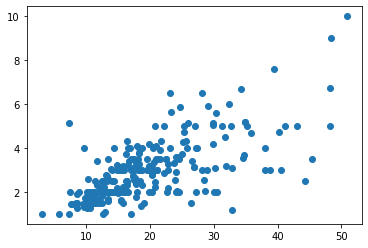

In [5]:
plt.scatter(df.total_bill, df.tip)

In [6]:
df['baseline'] = df.tip.mean()
df.baseline

0      2.998279
1      2.998279
2      2.998279
3      2.998279
4      2.998279
         ...   
239    2.998279
240    2.998279
241    2.998279
242    2.998279
243    2.998279
Name: baseline, Length: 244, dtype: float64

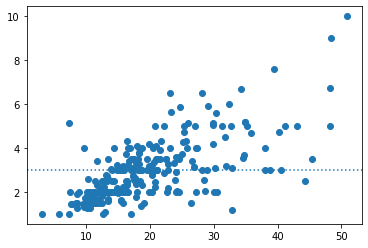

In [7]:
# plot data with baseline:
plt.scatter(df.total_bill, df.tip)
plt.axhline(df.tip.mean(), ls = ':')

2) Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

In [8]:
# Now we fit a regression model using OLS method. (OLS = ordinary least squares)

from statsmodels.formula.api import ols

# generate parameters, i.e. create model
ols_model = ols('tip ~ total_bill', data=df).fit()

# compute predictions and add to original dataframe
df['yhat'] = ols_model.predict(df.total_bill)

df

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,2.998279,3.969131
240,27.18,2.00,Female,Yes,Sat,Dinner,2,2.998279,3.774836
241,22.67,2.00,Male,Yes,Sat,Dinner,2,2.998279,3.301175
242,17.82,1.75,Male,No,Sat,Dinner,2,2.998279,2.791807


The code above fits a linear regression model on the df dataset, using column y as the target and column x as the predictor. Modify the code as necessary to work with the tips dataset.

3) Plot the residuals for the linear regression model that you made.


In [9]:
df['residual'] = df.tip - df.yhat

In [10]:
df['baseline_residual'] = df.tip - df.tip.mean()

In [11]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat,residual,baseline_residual
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,-1.694636,-1.988279
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,-0.346223,-1.338279
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,0.373165,0.501721
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,-0.097250,0.311721
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,0.107178,0.611721


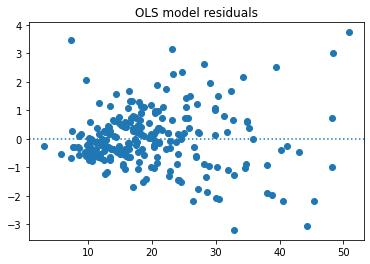

In [12]:
plt.scatter(df.total_bill, df.residual)
plt.axhline(y = 0, ls = ':')
plt.title('OLS model residuals');

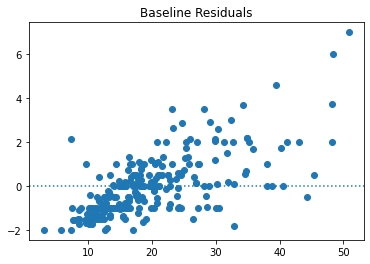

In [13]:
plt.scatter(df.total_bill, df.baseline_residual)
plt.axhline(y = 0, ls = ':')
plt.title('Baseline Residuals');

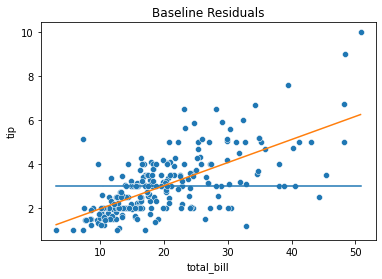

In [14]:
sns.scatterplot(x = 'total_bill', y ='tip', data = df)
sns.lineplot(x = 'total_bill', y ='baseline', data = df)
sns.lineplot(x = 'total_bill', y ='yhat', data = df)
plt.title('Baseline Residuals');

4) Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.


## SSE

In [15]:
df['residual^2'] = df.residual**2
df['baseline_residual^2'] = df.baseline_residual**2 
df

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat,residual,baseline_residual,residual^2,baseline_residual^2
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,-1.694636,-1.988279,2.871792,3.953252
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,-0.346223,-1.338279,0.119870,1.790990
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,0.373165,0.501721,0.139252,0.251724
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,-0.097250,0.311721,0.009458,0.097170
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,0.107178,0.611721,0.011487,0.374203
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,2.998279,3.969131,1.950869,2.921721,3.805888,8.536455
240,27.18,2.00,Female,Yes,Sat,Dinner,2,2.998279,3.774836,-1.774836,-0.998279,3.150043,0.996560
241,22.67,2.00,Male,Yes,Sat,Dinner,2,2.998279,3.301175,-1.301175,-0.998279,1.693057,0.996560
242,17.82,1.75,Male,No,Sat,Dinner,2,2.998279,2.791807,-1.041807,-1.248279,1.085361,1.558200


In [16]:
SSE = df['residual^2'].sum()
print("SSE = ", SSE)

SSE =  252.788743850776


In [17]:
SSE_baseline = df['baseline_residual^2'].sum()  
SSE_baseline

465.2124770491804

## TSS

In [18]:
TSS = SSE_baseline = df['baseline_residual^2'].sum()  
TSS

465.2124770491804

## MSE

In [19]:
MSE = SSE/len(df)
print("MSE = ", MSE)

MSE =  1.036019442011377


In [20]:
MSE_baseline = SSE_baseline/len(df)

In [21]:
MSE_baseline 

1.906608512496641

## RMSE

In [22]:
from math import sqrt
RMSE = sqrt(MSE)
print("RMSE = ", RMSE)
RMSE_baseline = sqrt(MSE_baseline)
print("RMSE baseline = ", RMSE_baseline)

RMSE =  1.0178504025697377
RMSE baseline =  1.3807999538298954


5) Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).


## MAE (Mean Absolute Error)

In [23]:
abs(df.baseline_residual).mean()

1.0330186777747912

### ESS 

In [24]:
ESS = sum((df.yhat - df.baseline)**2)
ESS

212.42373319840428

6) Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.


7) What is the amount of variance explained in your model?


In [25]:
ESS = TSS - SSE

TSS = SSE_baseline = df['baseline_residual^2'].sum()  

R2 = ESS/TSS

R2

0.45661658635167646

In [26]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           6.69e-34
Time:                        16:55:57   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

8) Is your model significantly better than the baseline model?

9) Create a file named evaluate.py that contains the following functions.
  plot_residuals(y, yhat): creates a residual plot
  
  regression_errors(y, yhat): returns the following values:
      sum of squared errors (SSE)
      explained sum of squares (ESS)
      total sum of squares (TSS)
      mean squared error (MSE)
      root mean squared error (RMSE)
  baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
  
  better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false
  
        model_significance(ols_model): that takes the ols model as input and returns the amount of variance explained in your model, and the value telling you whether your model is significantly better than the baseline model (Hint: use the rsquared and f_pvalue properties from the ols model)

In [27]:
from evaluate import time

In [28]:
df = time(df)
df.head()

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat,residual,baseline_residual,residual^2,baseline_residual^2
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,-1.694636,-1.988279,2.871792,3.953252
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,-0.346223,-1.338279,0.119870,1.790990
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,0.373165,0.501721,0.139252,0.251724
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,-0.097250,0.311721,0.009458,0.097170
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,0.107178,0.611721,0.011487,0.374203


In [29]:
from evaluate import plot_residuals

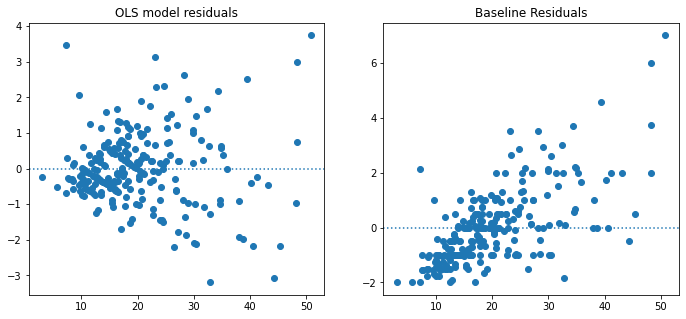

In [30]:
plot_residuals = plot_residuals(df)

In [31]:
from evaluate import regression_errors

In [32]:
SSE, TSS, MSE, RMSE = regression_errors(df)

In [33]:
SSE, TSS, MSE, RMSE

(252.788743850776, 465.2124770491804, 1.036019442011377, 1.0178504025697377)

In [34]:
from evaluate import baseline_mean_errors

In [35]:
SSE_baseline, MSE_baseline, RMSE_baseline = baseline_mean_errors(df)

In [36]:
SSE_baseline, MSE_baseline, RMSE_baseline 

(465.2124770491804, 1.906608512496641, 1.3807999538298954)

In [37]:
def better_than_baseline(df):
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    TSS = SSE_baseline = df['baseline_residual^2'].sum() 
    SSE = df['residual^2'].sum()
    ESS = TSS - SSE
    R2_m = ESS/TSS
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    TSS = SSE_baseline = df['residual^2'].sum()
    SSE = df['residual^2'].sum()
    ESS = TSS - SSE
    R2_b = ESS/TSS
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    newmodel = R2_m
    
    basemodel = R2_b
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~    
    if newmodel > basemodel:
        return True
    else:
        return False

In [38]:
better_than_baseline(df)

True

In [39]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat,residual,baseline_residual,residual^2,baseline_residual^2
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,-1.694636,-1.988279,2.871792,3.953252
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,-0.346223,-1.338279,0.119870,1.790990
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,0.373165,0.501721,0.139252,0.251724
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,-0.097250,0.311721,0.009458,0.097170
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,0.107178,0.611721,0.011487,0.374203


In [40]:
from statsmodels.formula.api import ols

In [41]:
def model_significance(df):
    ols_model = ols('tip ~ total_bill', data=df).fit()

    df['yhat'] = ols_model.predict(df.total_bill)
    return ols_model.summary()

In [42]:
l = model_significance(df)

In [43]:
l

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           6.69e-34
Time:                        16:55:58   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

10) Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [44]:
mpg = data('mpg')

In [45]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


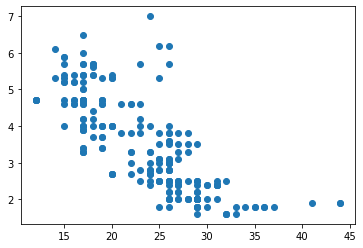

In [46]:
plt.scatter(mpg.hwy, mpg.displ)

In [47]:
model1 = ols('hwy ~ displ', data = mpg).fit()
predictions = model1.predict(mpg.displ)

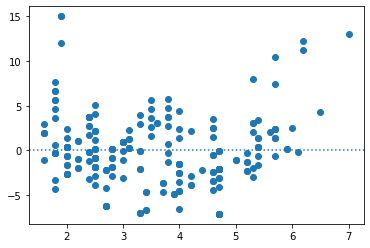

In [48]:
plt.scatter(mpg.displ, (mpg.hwy - predictions))
plt.axhline(0, ls = ':')

In [63]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    hwy   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     329.5
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           2.04e-46
Time:                        16:57:58   Log-Likelihood:                -645.62
No. Observations:                 234   AIC:                             1295.
Df Residuals:                     232   BIC:                             1302.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.6977      0.720     49.555      0.000      34.278      37.117
displ         -3.5306      0.195    -18.151      0.000      -3.914      -3.147
==============================================================================
Omnibus:                       45.280   Durbin-Watson:                   0.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.192
Skew:                           0.961   Prob(JB):                     2.60e-20
Kurtosis:                       5.357   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""